In [53]:
import rasterio as rs
import rasterio.merge as rsmerge
from rasterio.plot import show
from rasterio.windows import Window

from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib notebook

import os
from os.path import dirname, abspath, join

import geopandas

import numpy as np
import numpy


In [54]:
# GLOBAL PARAMS

current_url = os.getcwd()
home_url = dirname(abspath(current_url))
data_url = os.path.join(home_url, 'Data')
dtm_url = os.path.join(data_url, 'DTM')
dsm_url = os.path.join(data_url, 'DSM')
dtm_tiff_url = os.path.join(dtm_url, 'GeoTiff')
dsm_tiff_url = os.path.join(dsm_url, 'GeoTiff')
dtm_data_url = os.path.join(dtm_url, 'otherData')
dsm_data_url = os.path.join(dsm_url, 'otherData')


(9000, 17000)


<IPython.core.display.Javascript object>


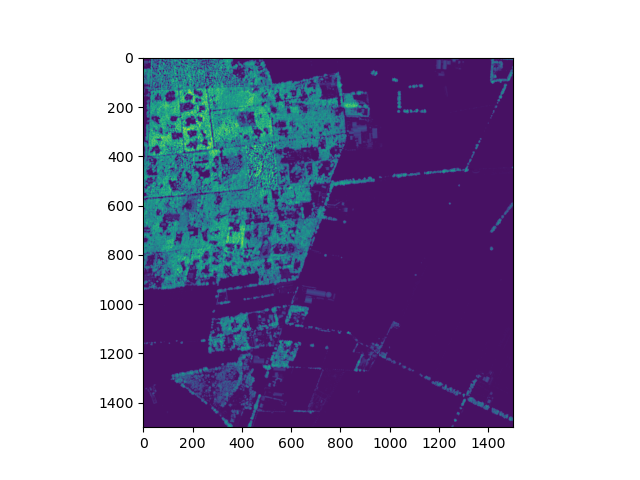

In [55]:
# working now with the first .tiff image.
file_name = 'DHMVIIDTMRAS1m_k01.tif'
file_url = os.path.join(dtm_tiff_url, file_name)

# open using rasterio which has the benefit of the .read() function giving a numpy array as a result.
img_dtm = rs.open(file_url)
full_img = img_dtm.read()

print(img_dtm.shape)
# change figure size and plot is.
plt.imshow(full_img[0])
plt.show()

In [56]:
"""
img_dtm.transform[2]

# crop the numpy array to avoid memoryErrors, which are very prone.
cropped_dtm = full_img[:, 7500:9000, 15500:17000]

# change figure size and plot is.
plt.figure(figsize=(22, 16))
plt.imshow(cropped_dtm[0, :, :])
plt.show()
"""

'\nimg_dtm.transform[2]\n\n# crop the numpy array to avoid memoryErrors, which are very prone.\ncropped_dtm = full_img[:, 7500:9000, 15500:17000]\n\n# change figure size and plot is.\nplt.figure(figsize=(22, 16))\nplt.imshow(cropped_dtm[0, :, :])\nplt.show()\n'

In [57]:
# working now with the first .tiff image.
file_name = 'DHMVIIDTMRAS1m_k01.tif'
file_url = os.path.join(dtm_tiff_url, file_name)

# open using rasterio which has the benefit of the .read() function giving a numpy array as a result.
img_dtm = rs.open(file_url)
full_img = img_dtm.read()

# crop the numpy array to avoid memoryErrors, which are very prone.
cropped_dtm = full_img[:, 7500:9000, 15500:17000]

# change figure size and plot is.
plt.imshow(cropped_dtm[0, :, :])
plt.show()

In [58]:
file_name = 'DHMVIIDSMRAS1m_k01.tif'
file_url = os.path.join(dsm_tiff_url, file_name)

img_dsm = rs.open(file_url)
full_img = img_dsm.read()
cropped_dsm = full_img[:, 7500:9000, 15500:17000]
plt.imshow(cropped_dsm[0, :, :])
plt.show()

In [59]:
# a first look at what it looks like to combine the first 2 maps. This operation gives the most 
# sensible looking result, allthough I don't know what it tells me.
new_dm = cropped_dsm / cropped_dtm

plt.imshow(new_dm[0, :, :])
plt.show()

<IPython.core.display.Javascript object>


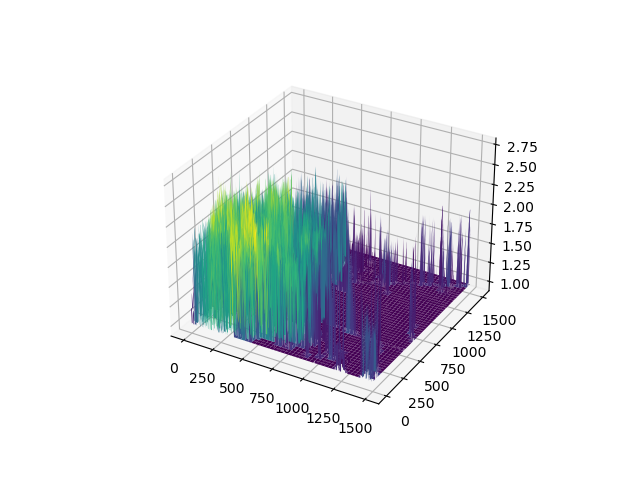

In [61]:
# how to handle 3d data from these tiff files. They are 1 dimensional numpy arrays.

# unpack the shape into x and y coordinates
n, m = new_dm[0].shape

# make a new meshgrid with the length of the size of the array
X, Y = np.meshgrid(np.arange(n), np.arange(m))

# create new figure
fig = plt.figure()

# create the axis needed for a 3d plot
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('auto')

# add the x, y and z coordinates and some coloration
ax.plot_surface(X, Y, new_dm[0], cmap='viridis')

# change background color.
ax.set_facecolor('white')
plt.show()

In [62]:
# we can use this to convert adress to coordinates used in the dataset.
# standard geopandas geocoding lib (photon) uses : <Geographic 2D CRS: EPSG:4326>
# the dataset uses : CRS.from_epsg(31370)

print(geopandas.tools.geocode('Sint-Marcusstraat 14, Borgerhout, Belgium').to_crs("EPSG:31370"))

# If you look at the dataset, the coordinates in the meta data look like this:

"""
| 1.00, 0.00, 145000.00|
| 0.00,-1.00, 247000.00|
| 0.00, 0.00, 1.00|
"""
# The last element of each line is actually x and y of the top-left point of the tiff file. 
# when you open the file the units on the x and y can be added to the above coordinates to get the 
# full and accurate coordinates.

# the size of the first raster is (9000,17000). If we add these to x and y, we should get the full
# coordinates of the map.
# top-left = (145000, 247000)
# bottom-left = (154000, 247000)
# top-right = (145000, 264000)
# bottom-right = (154000, 264000)

# looking up coordinates of Essen (which I know is in the scope of the map) on the internet, 
# they look like this:
coordinates = (156976.50, 239835.69)
map_coordinates = (145000.00, 247000.00)
tbf = abs(np.subtract(coordinates, map_coordinates))

file_name = 'DHMVIIDSMRAS1m_k01.tif'
file_url = os.path.join(dsm_tiff_url, file_name)

img_dsm = rs.open(file_url)
full_img = img_dsm.read()

crop_size = [tbf[0]-100, tbf[0]+100, tbf[1]-100, tbf[1]+100]
crop_size = [int(x) for x in crop_size]
print(crop_size)

cropped_tbf = full_img[:, crop_size[2]:crop_size[3], crop_size[0]:crop_size[1]]

# this can all be written in a function that gets the 3d image from a certain address!!

                        geometry  \
0  POINT (155092.610 211742.822)   

                                             address  
0  14, Sint-Marcusstraat, 2140, Sint-Marcusstraat...  
[11876, 12076, 7064, 7264]


<IPython.core.display.Javascript object>


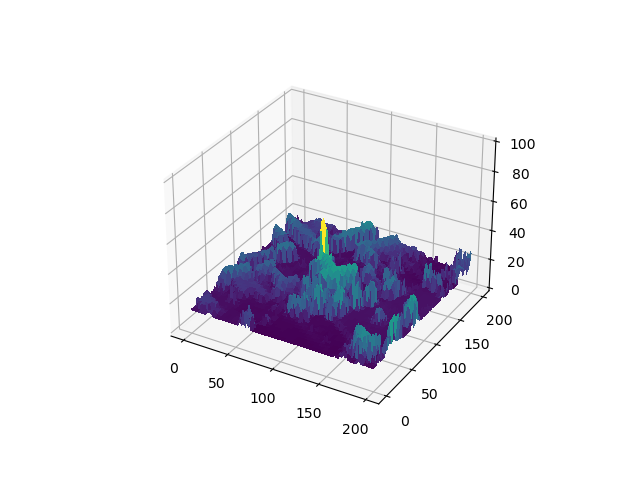

In [63]:
# how to handle 3d data from these tiff files. They are 1 dimensional numpy arrays.

# unpack the shape into x and y coordinates
n, m = cropped_tbf[0].shape

# make a new meshgrid with the length of the size of the array
X, Y = np.meshgrid(np.arange(n), np.arange(m))

# create new figure of a certain size
fig = plt.figure()

# create the axis needed for a 3d plot
ax = fig.add_subplot(111, projection='3d')

# change ticks on z-axis
ax.set_zlim(0, 100)

# add the x, y and z coordinates and some coloration
ax.plot_surface(X, Y, cropped_tbf[0], cmap='viridis', antialiased=False)

# change background color.
ax.set_facecolor('white')
plt.show()

In [64]:
# I found a web API that might give me acces to the elevation of the same databases that I am using now. 
# More specifically I can access the DHMV database which contains both dtm and dsm.
# I would have to set it up using selenium, and use an api which I have never done before, but
# it would be a really nice feature that would save about 80Gb of space on my computer.

# I think I will try it, because I have the other features working.

In [65]:
print(geopandas.tools.geocode('Sint-Marcusstraat 14, Borgerhout, Belgium').to_crs("EPSG:31370"))



                        geometry  \
0  POINT (155092.610 211742.822)   

                                             address  
0  14, Sint-Marcusstraat, 2140, Sint-Marcusstraat...  


In [66]:
from shapely.geometry import Point

# hacking an easy solution in stead of messing about with the polygon stuff.
# If I look up an address and get coordinates, I can also use these coordinates for a 
# reverse search. If I then move the coordinates in all directions, I can actually find 
# the boundaries of the plot.

coordinates = geopandas.tools.geocode('Sint-Marcusstraat 14, Borgerhout, Belgium').to_crs("EPSG:31370")
coordinates['geometry']

geopandas.tools.reverse_geocode(coordinates['geometry'].to_crs("EPSG:4326"))

coordinates['geometry']


0    POINT (155092.610 211742.822)
Name: geometry, dtype: geometry

In [67]:
geopandas.tools.geocode('Sint-Marcusstraat 14, Borgerhout, Belgium')

,geometry,address
0,POINT (4.44164 51.21561),"14, Sint-Marcusstraat, 2140, Sint-Marcusstraat..."


In [68]:
import requests
import json

def get_coordinates(address: str):
    req = requests.get(f"https://loc.geopunt.be/v4/Location?q={address}").json()
    info = {'address' : address, 
                'x_value' : req['LocationResult'][0]['Location']['X_Lambert72'],
                'y_value' : req['LocationResult'][0]['Location']['Y_Lambert72'],
                'street' : req['LocationResult'][0]['Thoroughfarename'],
                'house_number' : req['LocationResult'][0]['Housenumber'], 
                'postcode': req['LocationResult'][0]['Zipcode'], 
                'municipality' : req['LocationResult'][0]['Municipality']}
    
    detail = requests.get("https://api.basisregisters.vlaanderen.be/v1/adresmatch", 
                          params={"postcode": info['postcode'], 
                                  "straatnaam": info['street'],
                                  "huisnummer": info['house_number']}).json()
    building = requests.get(detail['adresMatches'][0]['adresseerbareObjecten'][0]['detail']).json()
    build = requests.get(building['gebouw']['detail']).json()
    info['polygon'] = [build['geometriePolygoon']['polygon']]
    return info

In [173]:
info = get_coordinates('spoorwegstraat 2, 2910 ESSEN')
info['polygon']

[{'coordinates': [[[155749.12238322943, 239249.43511197716],
    [155748.95163122565, 239250.202343978],
    [155745.97639922798, 239263.57667998597],
    [155746.97006322443, 239263.79824798554],
    [155746.4040472284, 239266.33648798615],
    [155744.08007922024, 239276.7577359937],
    [155739.49403122067, 239275.65744799376],
    [155726.99502321333, 239272.65853599086],
    [155722.52372720838, 239271.6178959906],
    [155742.8620312214, 239179.86736792699],
    [155748.16519922763, 239182.2471439317],
    [155764.27028723806, 239185.6795919314],
    [155763.02830323577, 239191.2408079356],
    [155761.392719239, 239198.5649679415],
    [155760.399439238, 239198.35133594275],
    [155756.16609523445, 239218.0402959548],
    [155757.06836723536, 239218.23421595618],
    [155756.04833523184, 239222.83632795885],
    [155754.9008152336, 239228.01303196326],
    [155751.34459123015, 239244.0568079725],
    [155750.36692722887, 239243.8401039727],
    [155749.12238322943, 239249.43511

In [174]:
x_max = max([x[0] for x in info['polygon'][0]['coordinates'][0]])
x_min = min([x[0] for x in info['polygon'][0]['coordinates'][0]])
y_max = max([y[1] for y in info['polygon'][0]['coordinates'][0]])
y_min = min([y[1] for y in info['polygon'][0]['coordinates'][0]])


In [175]:
x_max, x_min, y_max, y_min

(155764.27028723806, 155722.52372720838, 239276.7577359937, 239179.86736792699)

In [176]:
map_coordinates = (145000.00, 247000.00)
(x_min, y_min) = abs(np.subtract((x_min, y_min), map_coordinates))
(x_max, y_max) = abs(np.subtract((x_max, y_max), map_coordinates))

In [177]:
x_max, x_min, y_max, y_min

(10764.270287238061, 10722.523727208376, 7723.242264006287, 7820.132632073015)

In [178]:

file_name = 'DHMVIIDSMRAS1m_k01.tif'
file_url = os.path.join(dsm_tiff_url, file_name)

test_dsm = rs.open(file_url)
test_img = test_dsm.read()
print(test_img.shape)
crop_area = [x_min, x_max, y_min, y_max]
crop_area = [int(x) for x in crop_area]


cropped_test = test_img[:, crop_area[3]:crop_area[2], crop_area[0]:crop_area[1]]
print(crop_area)

# this can all be written in a function that gets the 3d image from a certain address!!

(1, 9000, 17000)
[10722, 10764, 7820, 7723]


<IPython.core.display.Javascript object>


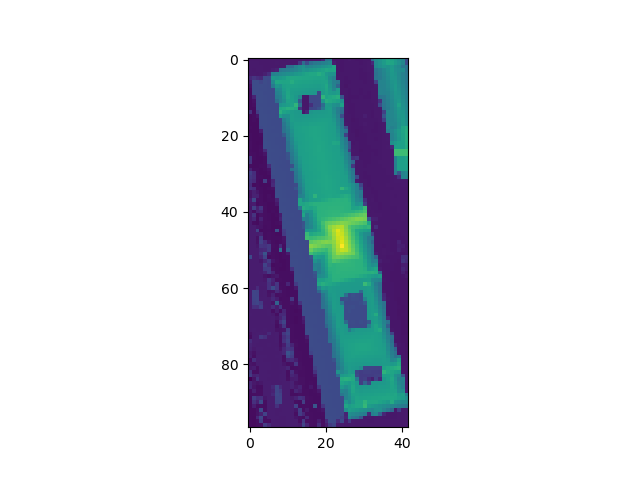

In [179]:
plt.figure()
plt.imshow(cropped_test[0, :, :]) 
plt.show()

(97, 42)
(97, 42)
(97, 42)


<IPython.core.display.Javascript object>


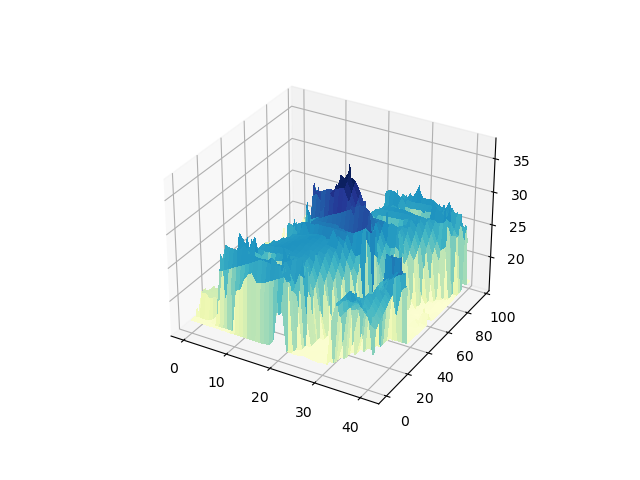

In [188]:
# how to handle 3d data from these tiff files. They are 1 dimensional numpy arrays.

# unpack the shape into x and y coordinates
n, m = cropped_test[0].shape

# make a new meshgrid with the length of the size of the array
X, Y = np.meshgrid(np.arange(m), np.arange(n))
print(cropped_test[0].shape)
print(X.shape)
print(Y.shape)

# create new figure of a certain size
fig = plt.figure()

# create the axis needed for a 3d plot
ax = fig.add_subplot(111, projection='3d')

ax.set_aspect('auto')

# change ticks on z-axis
#ax.set_zlim(0, 100)

# add the x, y and z coordinates and some coloration
ax.plot_surface(X, Y, cropped_test[0], cmap='YlGnBu', antialiased=False)

# change background color.
ax.set_facecolor('white')
plt.show()